In [56]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os

os.getcwd() 
os.chdir("/Users/macbook/Downloads/lending-club")
accepted = pd.read_csv("accepted_2007_to_2016.csv")
rejected = pd.read_csv("rejected_2007_to_2016.csv")

/Users/macbook/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
accepted.shape #(1321847,110)

(1321847, 110)

In [84]:
accepted.iloc [:, [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].sample(5)

,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op
1106964,0.0,0.0,0.0,2017-01-01,766.50,2017-02-01,2017-01-01,NaN,62.0,1.0,...,0.0,0.0,4.0,7957.0,3751.0,90.6,0.0,0.0,62.0,181.0
1113226,0.0,0.0,0.0,2017-01-01,287.44,2017-02-01,2017-01-01,NaN,NaN,1.0,...,0.0,0.0,0.0,5141.0,40.0,99.4,0.0,0.0,62.0,63.0
437065,0.0,0.0,0.0,2017-01-01,330.09,2017-02-01,2017-01-01,NaN,2.0,1.0,...,NaN,NaN,6.0,3906.0,7937.0,53.6,0.0,351.0,134.0,233.0
1255036,0.0,0.0,0.0,2017-01-01,495.80,2017-02-01,2017-01-01,NaN,NaN,1.0,...,0.0,1.0,4.0,9219.0,30311.0,30.0,0.0,0.0,138.0,103.0
434417,0.0,0.0,0.0,2016-09-01,80.81,NaT,2016-10-01,NaN,63.0,1.0,...,NaN,NaN,19.0,1705.0,45290.0,19.3,0.0,0.0,35.0,81.0


In [85]:
accepted.iloc [:, [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].isnull().sum()

total_rec_late_fee                   0
recoveries                           0
collection_recovery_fee              0
last_pymnt_d                      7669
last_pymnt_amnt                      0
next_pymnt_d                    492758
last_credit_pull_d                  77
collections_12_mths_ex_med     1301644
mths_since_last_major_derog     974768
policy_code                          0
application_type                     0
annual_inc_joint               1312547
dti_joint                      1312551
verification_status_joint      1312547
acc_now_delinq                 1314969
tot_coll_amt                   1130038
tot_cur_bal                      70276
open_acc_6m                    1058591
open_il_6m                      917290
open_il_12m                    1104845
open_il_24m                          0
mths_since_rcnt_il                   0
total_bal_il                         0
il_util                         926232
open_rv_12m                          0
open_rv_24m              

In [60]:
accepted['last_pymnt_d']= pd.to_datetime(accepted['last_pymnt_d'])
accepted['last_credit_pull_d']= pd.to_datetime(accepted['last_credit_pull_d'])
accepted['next_pymnt_d']= pd.to_datetime(accepted['next_pymnt_d'])

In [67]:
accepted.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint'], axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441.0,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742.0,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686.0,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957.0,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721.0,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [87]:
accepted[['last_pymnt_d', 'next_pymnt_d', 'next_pymnt_d']] = accepted[['last_pymnt_d', 'next_pymnt_d', 'next_pymnt_d']].replace(np.NaN, 'NA')
accepted[['collections_12_mths_ex_med', 'mths_since_last_major_derog']]= accepted[['collections_12_mths_ex_med', 'mths_since_last_major_derog']].replace(np.NaN, 0)
accepted[['acc_now_delinq','tot_coll_amt','open_acc_6m','open_il_6m','open_il_12m']]=accepted[['acc_now_delinq','tot_coll_amt','open_acc_6m','open_il_6m','open_il_12m']].replace(np.NaN, 0)
accepted[['tot_cur_bal']]=accepted[['tot_cur_bal']].replace(np.NAN, 'NA')
accepted[['open_il_24m','open_rv_12m','open_rv_24m','inq_fi']]=accepted[['open_il_24m','open_rv_12m','open_rv_24m','inq_fi']].replace(np.NaN, 0)
accepted['mths_since_rcnt_il'].fillna((accepted['mths_since_rcnt_il'].mean()), inplace=True)
accepted['total_bal_il'].fillna((accepted['total_bal_il'].mean()), inplace=True)
accepted['max_bal_bc'].fillna((accepted['max_bal_bc'].mean()), inplace=True)
accepted['total_rev_hi_lim'].fillna((accepted['total_rev_hi_lim'].mean()), inplace=True)
accepted[['total_cu_tl','inq_last_12m','acc_open_past_24mths','chargeoff_within_12_mths','delinq_amnt']]=accepted[['total_cu_tl','inq_last_12m','acc_open_past_24mths','chargeoff_within_12_mths','delinq_amnt']].replace(np.NaN, 0)
accepted['avg_cur_bal'].fillna((accepted['avg_cur_bal'].mean()), inplace=True)
accepted['bc_open_to_buy'].fillna((accepted['bc_open_to_buy'].mean()), inplace=True)
accepted['bc_util'].fillna((accepted['bc_util'].mean()), inplace=True)
accepted['mo_sin_old_il_acct'].fillna((accepted['mo_sin_old_il_acct'].mean()), inplace=True)
accepted['mo_sin_old_rev_tl_op'].fillna((accepted['mo_sin_old_rev_tl_op'].mean()), inplace=True)


,mths_since_rcnt_il,total_bal_il,max_bal_bc,total_rev_hi_lim
count,443459.000000,4.557180e+05,455718.000000,1.251571e+06
mean,21.271340,3.561987e+04,5777.327646,3.276469e+04
std,26.621487,4.257060e+04,5619.377345,3.669014e+04
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,7.000000,9.495000e+03,2362.000000,1.410000e+04
50%,13.000000,2.378100e+04,4385.000000,2.410000e+04
75%,24.000000,4.636400e+04,7460.000000,4.060000e+04
max,511.000000,1.547285e+06,776843.000000,9.999999e+06


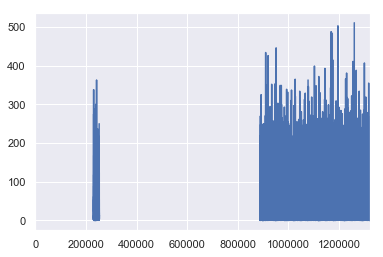

In [79]:
accepted['mths_since_rcnt_il'].plot()
accepted[['mths_since_rcnt_il', 'total_bal_il','max_bal_bc','total_rev_hi_lim']].describe()